# Where can I get In-n-Out?

#### Python tools

In [21]:
import pandas as pd
import geopandas as gpd
import altair as alt
import altair_stiles as altstiles
import matplotlib.pyplot as plt

In [2]:
pd.options.display.max_columns = 100
pd.options.display.max_rows = 1000
pd.options.display.max_colwidth = None

In [3]:
alt.themes.register("stiles", altstiles.theme)
alt.themes.enable("stiles")

ThemeRegistry.enable('grid')

---

#### Locations data source using my neighborhood's centroid

In [4]:
url = 'https://locations.in-n-out.com/api/finder/search/?latitude=33.985995&longitude=-118.4336666'

#### Read it into a dataframe

In [5]:
src = pd.read_json(url)

#### How many locations? 

In [6]:
len(src)

378

#### Clean up the dataframe

In [7]:
src.columns = src.columns.str.lower()

#### Dates

In [8]:
src['opened_date'] = pd.to_datetime(src['opendate'], errors='coerce').dt.date.astype(str)
src['opened_year'] = pd.to_datetime(src['opened_date']).dt.year.astype(str).str.replace('.0', '', regex=False)

In [9]:
len(src.sort_values('opened_date', ascending=True))

378

#### Slim down the dataframe to relevant columns

In [10]:
df = src[['storenumber', 'name', 'streetaddress', 'city', 'state', 'zipcode',
       'latitude', 'longitude', 'distance', 
       'imageurlthumb', 'opened_date', 'opened_year']].copy()

In [11]:
df.head()

,storenumber,name,streetaddress,city,state,zipcode,latitude,longitude,distance,imageurlthumb,opened_date,opened_year
0,140,Culver City,13425 Washington Blvd.,Marina Del Rey,CA,90292,33.99165,-118.44626,0.82,https://www.in-n-out.com/ino-images/default-source/location-store-images/thumbnail/140.jpg,1999-10-28,1999
1,117,Westchester,9149 S. Sepulveda Blvd.,Los Angeles,CA,90045,33.95369,-118.39677,3.08,https://www.in-n-out.com/ino-images/default-source/location-store-images/thumbnail/117.jpg,1997-01-22,1997
2,55,West Los Angeles,9245 W. Venice Blvd.,Los Angeles,CA,90034,34.02646,-118.39427,3.60,https://www.in-n-out.com/ino-images/default-source/location-store-images/thumbnail/55.jpg,1989-09-06,1989
3,309,El Segundo,600 N. Sepulveda Blvd.,El Segundo,CA,90245,33.92387,-118.39582,4.81,https://www.in-n-out.com/ino-images/default-source/location-store-images/thumbnail/309.jpg,2015-12-30,2015
4,119,Westwood,922 Gayley,Los Angeles,CA,90024,34.06306,-118.44803,5.39,https://www.in-n-out.com/ino-images/default-source/location-store-images/thumbnail/119.jpg,1997-04-01,1997


#### Which one is closest?

In [12]:
df[df['distance'] == df['distance'].min()]

,storenumber,name,streetaddress,city,state,zipcode,latitude,longitude,distance,imageurlthumb,opened_date,opened_year
0,140,Culver City,13425 Washington Blvd.,Marina Del Rey,CA,90292,33.99165,-118.44626,0.82,https://www.in-n-out.com/ino-images/default-source/location-store-images/thumbnail/140.jpg,1999-10-28,1999


#### Which one is farthest?

In [13]:
df[df['distance'] == df['distance'].max()]

,storenumber,name,streetaddress,city,state,zipcode,latitude,longitude,distance,imageurlthumb,opened_date,opened_year
377,350,Stafford,12611 S. Kirkwood Rd.,Stafford,TX,77477,29.63807,-95.58031,1373.39,https://www.in-n-out.com/ino-images/default-source/location-store-images/thumbnail/350.jpg,2019-11-22,2019


#### How many within 20 miles? 

In [14]:
len(df[df['distance'] <= 20])

36

In [15]:
close = df[df['distance'] <= 20]

---

## Export

#### All locations to json, csv

In [16]:
df.to_json('data/processed/locations.json', orient='records', indent=4)

In [17]:
df.to_csv('data/processed/locations.csv', index=False)

#### Make it a geo file

In [18]:
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude))

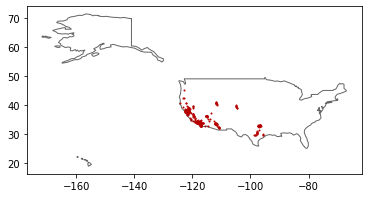

In [19]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world[world.name == 'United States of America'].plot(color='white', alpha=1, edgecolor='#666666')
gdf.plot(ax=ax, color='#b60000', markersize=1)

plt.show()

#### All locations to GeoJSON

In [20]:
gdf.to_file('data/processed/locations.geojson', driver='GeoJSON')